In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [1]:
import cv2
import numpy as np
import os

In [2]:
from tensorflow.keras.applications import resnet50,ResNet50
from tensorflow.keras.preprocessing import image

In [3]:
img = cv2.imread(r"D:\download\archive\chest_xray\chest_xray\test\NORMAL\IM-0001-0001.jpeg")

In [5]:
import matplotlib.pyplot as plt

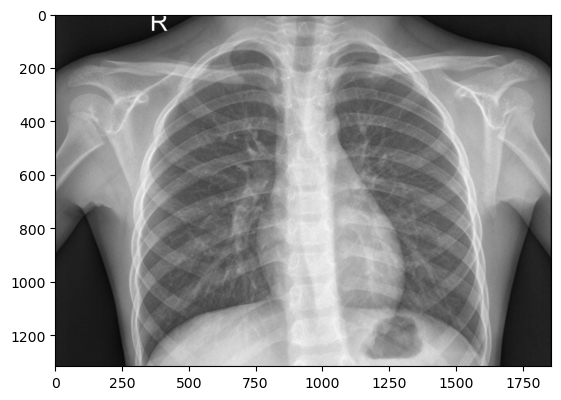

In [6]:
plt.imshow(img)

In [7]:
img = cv2.resize(img,(150,150))

In [8]:
import matplotlib.pyplot as plt

In [9]:
img = image.img_to_array(img)

In [10]:
img = resnet50.preprocess_input(np.expand_dims(img.copy(),axis = 0))

In [6]:
model = ResNet50(weights = "imagenet",input_shape = (150,150,3),include_top = False)

In [12]:
img = model.predict(img)

1/1 [==============================] - 1s 788ms/step


In [13]:
img.shape

(1, 5, 5, 2048)

In [14]:
img = img.flatten()
img.shape

(51200,)

In [7]:
train_dir = r"D:/download/archive/chest_xray/chest_xray/train"
test_dir = r"D:/download/archive/chest_xray/chest_xray/test"
X_train = []
Y_train = []
err_counter = 1

In [8]:
for i in os.listdir(train_dir):
    print(i)
    for j in os.listdir(train_dir + "/" + i):
        img = cv2.imread(train_dir + "/" + i + "/" + j)
        img = cv2.resize(img,(150,150))
        img = image.img_to_array(img)
        img = resnet50.preprocess_input(np.expand_dims(img.copy(),axis = 0))
        img = model.predict(img)
        X_train.append(img.flatten()/255)
        Y_train.append(i)

NORMAL
1/1 [==============================] - 0s 53ms/step


1/1 [==============================] - 0s 51ms/step


1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 59ms/step


1/1 [==============================] - 0s 60ms/step
PNEUMONIA
1/1 [==============================] - 0s 55ms/step


1/1 [==============================] - 0s 58ms/step


1/1 [==============================] - 0s 56ms/step


1/1 [==============================] - 0s 56ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 59ms/step


1/1 [==============================] - 0s 60ms/step


1/1 [==============================] - 0s 60ms/step


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 61ms/step


1/1 [==============================] - 0s 65ms/step


1/1 [==============================] - 0s 78ms/step


1/1 [==============================] - 0s 68ms/step


In [9]:
X_test = []
Y_test = []
for i in os.listdir(test_dir):
    print(i)
    for j in os.listdir(test_dir + "/" + i):
        img = cv2.imread(test_dir + "/" + i + "/" + j)
        img = cv2.resize(img,(150,150))
        img = image.img_to_array(img)
        img = resnet50.preprocess_input(np.expand_dims(img.copy(),axis = 0))
        img = model.predict(img)
        X_test.append(img.flatten()/255)
        Y_test.append(i)

NORMAL
1/1 [==============================] - 0s 68ms/step
PNEUMONIA
1/1 [==============================] - 0s 69ms/step


1/1 [==============================] - 0s 68ms/step


In [10]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [11]:
from sklearn import linear_model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# 使用LabelEncoder将字符串标签转换为二进制形式
le = LabelEncoder()
Y_test_binary = le.fit_transform(Y_test)

model = linear_model.LogisticRegression()
model.fit(X_train,Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
print(cm)
print("accuracy is ",(cm[0,0]+cm[1,1])/(sum(sum(cm))))

[[ 99 135]
 [  0 390]]
accuracy is  0.7836538461538461


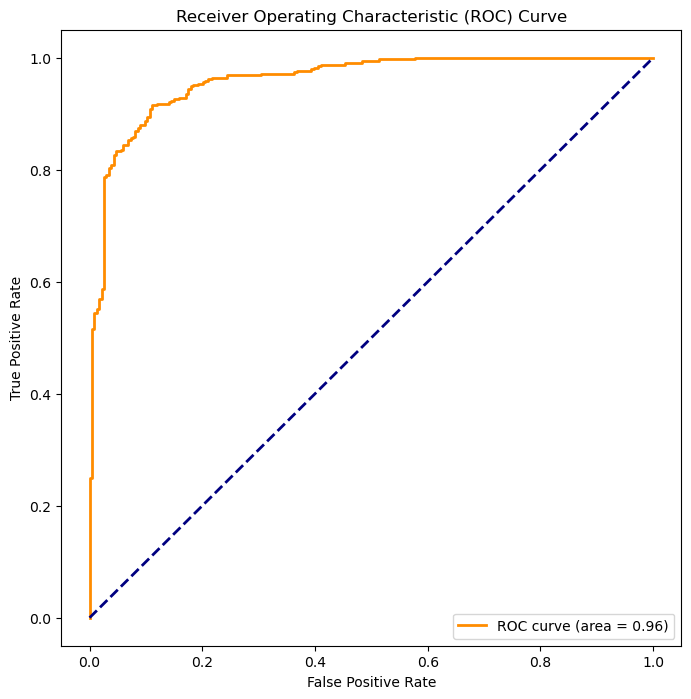

In [12]:
from sklearn import linear_model
# 计算ROC曲线的值
pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test_binary, pred_prob)
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [13]:
from sklearn import ensemble
model = ensemble.RandomForestClassifier()
model.fit(X_train,Y_train)
pred = model.predict(X_test)
cm = confusion_matrix(Y_test,pred)
print(cm)
print("accuracy is ",(cm[0,0]+cm[1,1])/(sum(sum(cm))))

[[ 96 138]
 [  7 383]]
accuracy is  0.7676282051282052


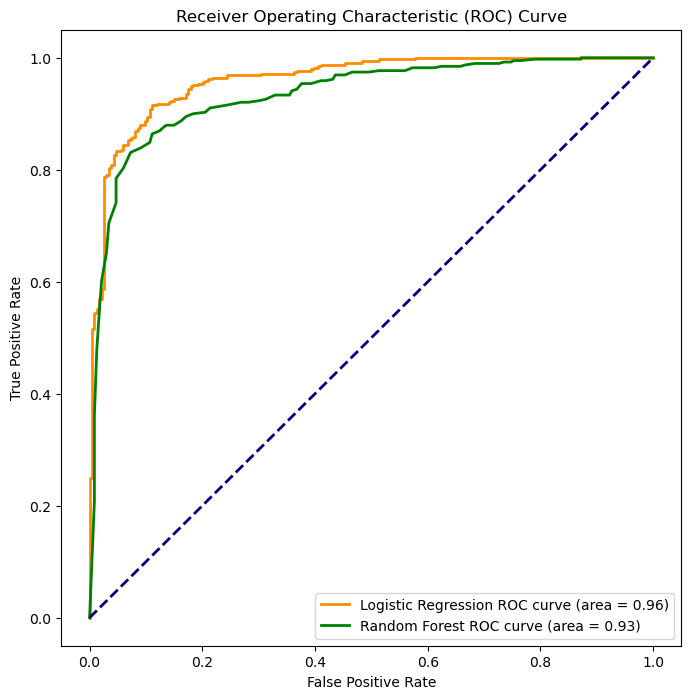

In [14]:
# from sklearn import linear_model, ensemble
# from sklearn.metrics import confusion_matrix, roc_curve, auc
# from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# 训练第一个模型（Logistic Regression）
model1 = linear_model.LogisticRegression()
model1.fit(X_train, Y_train)
pred_prob1 = model1.predict_proba(X_test)[:, 1]
fpr1, tpr1, thresholds1 = roc_curve(Y_test_binary, pred_prob1)
roc_auc1 = auc(fpr1, tpr1)

# 训练第二个模型（Random Forest）
model2 = ensemble.RandomForestClassifier()
model2.fit(X_train, Y_train)
pred_prob2 = model2.predict_proba(X_test)[:, 1]
fpr2, tpr2, thresholds2 = roc_curve(Y_test_binary, pred_prob2)
roc_auc2 = auc(fpr2, tpr2)

# 绘制ROC曲线
plt.figure(figsize=(8, 8))

# 绘制第一个模型的ROC曲线
plt.plot(fpr1, tpr1, color='darkorange', lw=2, label='Logistic Regression ROC curve (area = {:.2f})'.format(roc_auc1))

# 绘制第二个模型的ROC曲线
plt.plot(fpr2, tpr2, color='green', lw=2, label='Random Forest ROC curve (area = {:.2f})'.format(roc_auc2))

# 绘制对角线
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [1]:
from sklearn import ensemble